In this notebook, We will implement Principal component analysis on Breast cancer dataset in Sklearn datsets. The dataset have 31 input features, which are hard to be handled by any algorithm due to curse of dimensionality. We will use PCA and reduce the dimensionality of the dataset.

In [0]:
#Importing Necessary Libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
#Loading data and checking shape of data
breast = load_breast_cancer()
breast_dataset = pd.DataFrame(breast.data) #converting numpy array into dataframe
breast_dataset.columns = breast.feature_names #giving column names
breast_dataset['label'] = breast.target #adding target variable
breast_dataset.head(), breast_dataset.shape

(   mean radius  mean texture  ...  worst fractal dimension  label
 0        17.99         10.38  ...                  0.11890      0
 1        20.57         17.77  ...                  0.08902      0
 2        19.69         21.25  ...                  0.08758      0
 3        11.42         20.38  ...                  0.17300      0
 4        20.29         14.34  ...                  0.07678      0
 
 [5 rows x 31 columns], (569, 31))

In [0]:
# Replacing 0 with Benign and 1 with Malignant
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [22]:
#Scaling the input variables and checking the mean and standard deviation of the distribution.
x = breast_dataset.drop(columns='label',axis=1)
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape
print("Mean and Standard Deviation after scaling is ",np.mean(x), np.std(x))

Mean and Standard Deviation after scaling is  -6.118909323768877e-16 1.0


Converting all the scaled Input feature in a dataframe to feed it to PCA algorithm.

In [15]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]  #creating list of all normalized features
normalised_breast = pd.DataFrame(x,columns=feat_cols) # converting it in a dataframe
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


# Creating a PCA model and fitting it to normalized features.

In [0]:

pca_breast = PCA(n_components=2) # Creating a PCA object 
principalComponents_breast = pca_breast.fit_transform(x) #fitting it to the model

The PCA converted 31 columns into 2 columns.

In [25]:
principalComponents_breast.shape

(569, 2)

In [17]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast,columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [18]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


Plotting the information from 2 components created by PCA.

<Figure size 432x288 with 0 Axes>

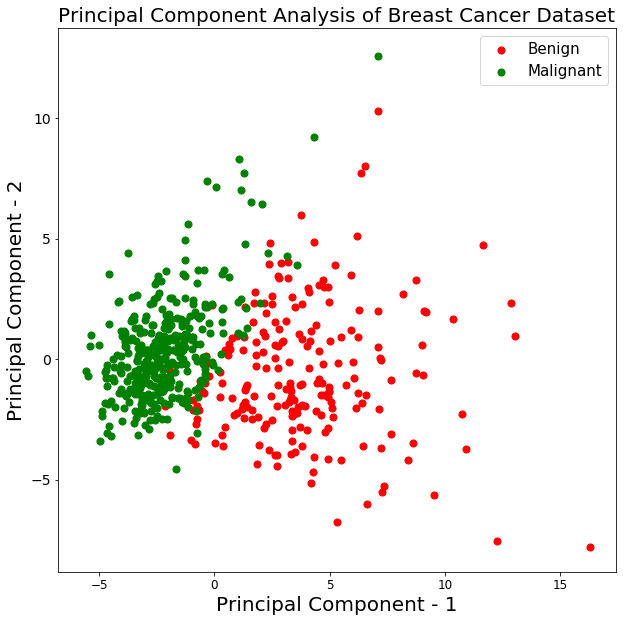

In [19]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})